# Project 3 House Prediction
Mechine Learning Indonesia AI | 
Group A & B

## 1. Menggabungkan Semua Dengan Pipeline

In [1]:
# Menyiapkan Library 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#Menghilangkan warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
target = 'SalePrice'

In [6]:
#Membagi kolom menjadi kolom numerik dan kategori
var_kategori = [var for var in df.columns if df[var].dtype=='O' and var!=target]
var_numerik = [var for var in df.columns if df[var].dtype!='O' and var!=target]

#Melihat variabel 
print(var_kategori)
print(var_numerik)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '

In [7]:
df.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [8]:
# Melihat variabel apa saja yang kosong
var_kosong = [var for var in df.columns if df[var].isnull().mean() > 0]
var_kosong

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [9]:
# Melihat tipe data di var_kosong
df[var_kosong].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [10]:
# Melihat tampilan variabel dengan missing values
df[var_kosong].head(10)

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,NaN,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,NaN,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
5,85.0,NaN,NaN,0.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,1993.0,Unf,TA,TA,NaN,MnPrv,Shed
6,75.0,NaN,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,2004.0,RFn,TA,TA,NaN,NaN,NaN
7,NaN,NaN,Stone,240.0,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Attchd,1973.0,RFn,TA,TA,NaN,NaN,Shed
8,51.0,NaN,NaN,0.0,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,1931.0,Unf,Fa,TA,NaN,NaN,NaN
9,50.0,NaN,NaN,0.0,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,1939.0,RFn,Gd,TA,NaN,NaN,NaN


In [11]:
# Melihat persentase banyaknya nilai kosong di var_kosong
# Kita mulai dengan menghitung nilai rataan nilai kosong dan menyimpannya sebagai df_kosong
df_kosong = df[var_kosong].isnull().mean()

# Kita bisa menggunakan method isnull() maupun isna(), keduanya sama saja

# Merubahnya menjadi format dataframe (tabel)
df_kosong = pd.DataFrame(df_kosong.reset_index())

# Memberikan nama kolom ke tabel df_kosong 
df_kosong.columns = ['variabel', 'proporsi missing']

# Menambah kolom baru untuk melihat tipe data
df_kosong['tipe data'] = [var for var in df[var_kosong].dtypes]

# Mengurutkan tabel mulai dari nilai 'proporsi missing' besar ke kecil
df_kosong.sort_values(by='proporsi missing', ascending=False, inplace=True)

# Melihat tampilan tabel df_kosong
df_kosong

,variabel,proporsi missing,tipe data
16,PoolQC,0.995205,object
18,MiscFeature,0.963014,object
1,Alley,0.937671,object
17,Fence,0.807534,object
2,MasVnrType,0.597260,object
10,FireplaceQu,0.472603,object
0,LotFrontage,0.177397,float64
11,GarageType,0.055479,object
12,GarageYrBlt,0.055479,float64
13,GarageFinish,0.055479,object


In [12]:
# Menyeleksi hanya yang memiliki proporsi < 0.05 dan menyimpannya sebagai list var_cca
var_cca = [var for var in var_kosong if df[var].isnull().mean() < 0.05]
var_cca

['MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical']

Sekarang kita akan menghapus beberapa baris nilai kosong pada 6 variabel di atas.

*Method* yang digunakan adalah `dropna()` dari *library* pandas.

In [13]:
df_cca = df.dropna(subset=var_cca)

# Membandingkan dimensi df (baris, kolom) sebelum dan sesudah CCA
df.shape, df_cca.shape

((1460, 81), (1412, 81))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    df_cca.drop(target, axis=1),
    df_cca[target],
    test_size=0.3,
    random_state= 0)

for i in [X_train, X_test, y_train, y_test]:
    i.reset_index(drop=True, inplace=True)

X_train.shape, X_test.shape

((988, 80), (424, 80))

In [15]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,85,80,RL,NaN,8530,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,5,2009,WD,Normal
1,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
2,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,0,NaN,NaN,NaN,0,12,2006,WD,Normal
3,1033,60,RL,NaN,14541,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Abnorml
4,360,60,RL,78.0,12011,Pave,NaN,IR1,Lvl,AllPub,...,374,0,NaN,NaN,NaN,0,6,2006,WD,Normal


In [16]:
y_train.head()

0    168500
1    466500
2    280000
3    310000
4    280000
Name: SalePrice, dtype: int64

In [17]:
# Membuat Pipeline untuk preprocessing
preprocessor_numerik = Pipeline([
    ('imputasi', SimpleImputer(strategy='median')),
    ('scaling', StandardScaler())
])

preprocessor_kategori = Pipeline([
    ('imputasi', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoding', OneHotEncoder(drop='first',
                               handle_unknown='ignore',
                               sparse_output=False))         
])

# Menggabungkan kedua pipeline di atas
preprocessor = ColumnTransformer([
    ('preprocessing numerik', preprocessor_numerik, var_numerik),
    ('preprocessing kategori', preprocessor_kategori, var_kategori)],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [18]:
# Membuat Pipeline untuk modeling
model_reg = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regresi lasso', Lasso())
])

In [19]:
# Mengeksekusi Pipeline akhir
model_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('preprocessing numerik',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUn...
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])],
                                   verbose_feature_names_out=False)),
                ('regresi lasso', Lasso())])

In [20]:
# Mencoba memprediksi training set
model_reg.predict(X_train)

array([165667.4618691 , 474201.79884721, 286590.25795072, 316481.12979749,
       301545.57661717, 151575.44516847,  83368.53088494,  95954.47180566,
       105110.95404696, 193161.82216832, 163587.80400049, 176478.32686298,
       124761.73674275,  48809.98343488, 296669.32694342, 171420.3554079 ,
       407235.50356333, 126912.96402408, 130526.69735497, 202594.47208815,
       161492.93001321, 130871.27905436, 240515.68494348, 517507.10062719,
       178388.77451634,  93971.55761915, 281321.78550855, 179353.49161649,
       196935.08934103, 120607.29487718, 148278.20180885, 190399.65300708,
       155788.89624239, 131275.28258048, 153264.52083502, 131609.08318753,
       164527.69147097, 137347.85605137, 131544.10274677, 155449.31841692,
       173657.53727862, 298074.62876295, 119656.70024708, 164410.02299946,
       157509.3107942 , 135116.24235042, 140970.91741625, 109673.14228319,
       173352.1825933 , 224166.56341557, 158226.16758242, 163332.22510589,
       272869.5761396 , 1

In [21]:
# Transform data using the preprocessing pipeline
X_train_preprocessed = model_reg.named_steps['preprocessing'].transform(X_train)

# Convert transformed data into DataFrame
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed)

# Optional: Assign column names to the DataFrame if you want
# Assuming 'var_numerik' and 'var_kategori' are lists containing column names
# You can concatenate them to get the full list of column names
column_names = var_numerik + preprocessor.named_transformers_['preprocessing kategori']\
                .named_steps['encoding'].get_feature_names_out(input_features=var_kategori).tolist()

# Assign column names to the DataFrame
X_train_preprocessed_df.columns = column_names


In [22]:
X_train_preprocessed_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.522968,0.532703,-0.040509,-0.201940,0.633056,-0.525570,0.772777,0.529898,-0.455845,-0.984574,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.523475,-0.865200,-0.040509,0.068470,2.850995,-0.525570,0.969556,0.824380,3.179261,1.751090,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.655594,-0.865200,-0.360695,5.661419,0.633056,-0.525570,0.116846,-0.500788,-0.572935,0.413133,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.717550,0.066735,-0.040509,0.364412,1.372369,1.258839,0.707184,0.382657,-0.572935,1.174936,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.873028,0.066735,0.371158,0.126038,1.372369,-0.525570,0.871167,0.628059,2.247864,1.055437,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,0.138513,0.066735,0.279677,-0.050058,0.633056,-0.525570,1.067946,0.922540,-0.572935,0.415267,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
984,0.308679,0.066735,-0.040509,0.033514,-0.106258,1.258839,-0.112730,-0.059065,0.597963,0.336312,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
985,1.256409,0.066735,-0.040509,1.319890,-0.106258,-0.525570,0.903963,0.677139,-0.572935,-0.984574,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
986,-0.357804,0.532703,1.194494,0.103990,-0.845571,0.366635,-0.178323,-0.942510,-0.056676,-0.284654,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Transform data using the preprocessing pipeline
X_test_preprocessed = model_reg.named_steps['preprocessing'].transform(X_test)

# Convert transformed data into DataFrame
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed)

# Optional: Assign column names to the DataFrame if you want
# Assuming 'var_numerik' and 'var_kategori' are lists containing column names
# You can concatenate them to get the full list of column names
column_names = var_numerik + preprocessor.named_transformers_['preprocessing kategori']\
                .named_steps['encoding'].get_feature_names_out(input_features=var_kategori).tolist()

# Assign column names to the DataFrame
X_test_preprocessed_df.columns = column_names


In [24]:
X_test_preprocessed_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.953385,-0.282740,-0.909586,-0.534533,-0.845571,0.366635,-0.998237,-1.727795,-0.572935,-0.737041,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.291628,0.066735,0.691345,0.275752,0.633056,0.366635,-0.211120,0.235416,0.363783,-0.015782,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.109877,-0.865200,0.005231,-0.148235,0.633056,-0.525570,0.969556,0.775300,-0.572935,-0.984574,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.237270,0.066735,0.005231,0.087879,-0.845571,-0.525570,-0.079933,-0.795269,0.448939,0.402463,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.317858,-0.865200,-0.040509,-0.083223,-0.106258,-0.525570,-0.276713,-1.089751,1.827406,0.229617,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,0.110152,1.464638,-1.732922,-0.581643,-0.106258,-0.525570,0.871167,0.628059,1.130189,0.863386,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
420,0.923167,-0.865200,0.005231,-0.293332,-0.845571,-0.525570,-0.407899,-1.286072,-0.572935,-0.197164,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
421,-1.319714,-0.166249,-0.040509,0.158732,-0.845571,0.366635,-0.998237,-1.727795,-0.572935,-0.216369,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
422,0.630104,-0.166249,-0.863845,-0.561669,-1.584884,1.258839,-0.834254,-1.727795,-0.572935,-0.165155,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_baru = pd.concat([X_train_preprocessed_df, X_test_preprocessed_df], axis=1)
df_baru

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.522968,0.532703,-0.040509,-0.201940,0.633056,-0.525570,0.772777,0.529898,-0.455845,-0.984574,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.523475,-0.865200,-0.040509,0.068470,2.850995,-0.525570,0.969556,0.824380,3.179261,1.751090,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.655594,-0.865200,-0.360695,5.661419,0.633056,-0.525570,0.116846,-0.500788,-0.572935,0.413133,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.717550,0.066735,-0.040509,0.364412,1.372369,1.258839,0.707184,0.382657,-0.572935,1.174936,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.873028,0.066735,0.371158,0.126038,1.372369,-0.525570,0.871167,0.628059,2.247864,1.055437,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,0.138513,0.066735,0.279677,-0.050058,0.633056,-0.525570,1.067946,0.922540,-0.572935,0.415267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
984,0.308679,0.066735,-0.040509,0.033514,-0.106258,1.258839,-0.112730,-0.059065,0.597963,0.336312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,1.256409,0.066735,-0.040509,1.319890,-0.106258,-0.525570,0.903963,0.677139,-0.572935,-0.984574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986,-0.357804,0.532703,1.194494,0.103990,-0.845571,0.366635,-0.178323,-0.942510,-0.056676,-0.284654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Melihat intercept
print(model_reg['regresi lasso'].intercept_)

# Melihat koefisien
print(model_reg['regresi lasso'].coef_)

-1186202.9624692318
[ 8.37370558e+01 -3.92097607e+03  1.17079709e+03  9.36444025e+03
  7.78296665e+03  6.95548240e+03  1.42500132e+04  2.36832927e+03
  5.02140304e+03  1.03698872e+04  2.56552184e+03  3.87399440e+03
  4.50982840e+03  1.83934662e+04  2.73764543e+04  8.84315269e+01
  4.30147350e+03  1.53398487e+03  9.34553540e+02  2.77488395e+03
  1.89811656e+03 -3.66855084e+03 -2.34262910e+03  2.14476371e+03
  2.79268449e+02  7.16694872e+02  2.17969073e+03  2.46403112e+03
  2.25604172e+03  1.40518744e+03  1.83687705e+03  3.99911109e+02
  1.87319837e+03  5.94824455e+04  8.79320855e+02  2.14577124e+01
 -3.22497780e+02  3.42827147e+04  1.18191147e+04  1.80881688e+04
  1.36994298e+04  1.92653721e+04 -2.46388954e+03  4.88584525e+02
  4.00954616e+03 -3.92874282e+03  1.30046891e+03  1.18773631e+04
 -1.25916428e+04  1.58419374e+03 -2.19649037e+04  6.62409649e+03
 -4.78244666e+03 -5.65881967e+03 -1.81436719e+03  6.66668420e+02
 -4.30693940e+04  3.97055510e+03  4.83942312e+02 -2.87786731e+03
 -2.0

In [27]:
# Melihat nama kolom preprocessing
print(model_reg['preprocessing'].get_feature_names_out())

['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'MSZoning_FV' 'MSZoning_RH' 'MSZoning_RL' 'MSZoning_RM' 'Street_Pave'
 'Alley_Pave' 'Alley_missing' 'LotShape_IR2' 'LotShape_IR3' 'LotShape_Reg'
 'LandContour_HLS' 'LandContour_Low' 'LandContour_Lvl' 'Utilities_NoSeWa'
 'LotConfig_CulDSac' 'LotConfig_FR2' 'LotConfig_FR3' 'LotConfig_Inside'
 'LandSlope_Mod' 'LandSlope_Sev' 'Neighborhood_Blueste'
 'Neighborhood_BrDale' 'Neighborhood_BrkSide' 'Neighborhood_ClearCr'
 'Neighborhood_CollgCr' 'Neighborhood_Crawfor' 'Neighborhood_Edwards'
 'Neighborhood_Gilbert' 'Neighborhood

<br>

### Evaluasi di *Training Set*

In [28]:
#Memprediksi X_train dan membandingkan y_train
pred_train = model_reg.predict(X_train)

In [29]:
pred_train = pd.DataFrame(pred_train, columns=[target])
pred_train.head()

,SalePrice
0,165667.461869
1,474201.798847
2,286590.257951
3,316481.129797
4,301545.576617


In [30]:
banding_train = pd.DataFrame(np.column_stack((pred_train, pd.DataFrame(y_train), abs(pred_train - pd.DataFrame(y_train)))), columns=['Prediksi', 'Asli', 'Error'])
banding_train.head()

,Prediksi,Asli,Error
0,165667.461869,168500.0,2832.538131
1,474201.798847,466500.0,7701.798847
2,286590.257951,280000.0,6590.257951
3,316481.129797,310000.0,6481.129797
4,301545.576617,280000.0,21545.576617


Kolom eror menunjukkan selisih antara prediksi di training set

In [31]:
# Menghitung nilai rata-rata dari error yang sudah dibuat absolut (MAE = Mean absolute error)
banding_train.describe()

,Prediksi,Asli,Error
count,988.000000,988.000000,988.000000
mean,183810.504049,183810.504049,12825.126146
std,77724.039277,80076.268377,13871.399920
min,33337.440565,35311.000000,14.141078
25%,130949.171573,131875.000000,4198.208311
50%,165642.899616,164995.000000,9108.044282
75%,218904.530185,216877.750000,17162.963859
max,651902.874923,755000.000000,134639.145940


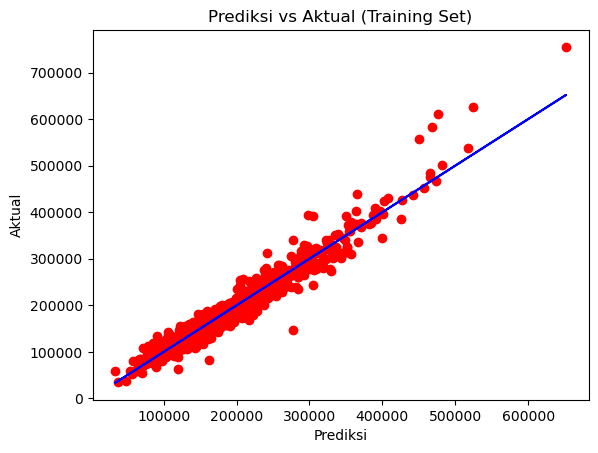

In [32]:
# Visualisasi hasil Training Set
plt.scatter(pred_train, y_train, color = 'red')
plt.plot(pred_train, model_reg.predict(X_train), color = 'blue')
plt.title('Prediksi vs Aktual (Training Set)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

<br>

### Menghitung *Metrics* di *Training Set*

In [33]:
# Menghitung nilai error (MAE, MSE, RMSE) di Training Set
from sklearn import metrics
print('MAE = {0:.2f}'.format(metrics.mean_absolute_error(y_train, pred_train)))           
print('MSE = {0:.2f}'.format(metrics.mean_squared_error(y_train, pred_train)))            
print('RMSE = {0:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train, pred_train))))
print('R2 = {0:.2f}'.format(metrics.r2_score(y_train, pred_train)))

MAE = 12825.13
MSE = 356704843.63
RMSE = 18886.63
R2 = 0.94


MAE adalah nilai error rata-rata seperti yang ada di tabel banding_train
penulisan {0:.2f} adalah untuk menuliskan 2 angka di belakang koma

<br>

### Evaluasi di *Test Set*

memprediksi data yang belum pernah dilihat oleh model regresi, yaitu nilai Salesprice yang ada di test set.

In [34]:
pred_test = model_reg.predict(X_test)

In [35]:
pred_test = pd.DataFrame(pred_test, columns=[target])
pred_test.head()

,SalePrice
0,84955.591095
1,201477.681844
2,171520.158125
3,163365.688938
4,143863.332613


In [36]:
# Membandingkan 2 numpy array (kita gunakan np.column_stack untuk menggabungkan kedua array ini)
banding_test = pd.DataFrame(np.column_stack((pred_test, pd.DataFrame(y_test), abs(pred_test - pd.DataFrame(y_test)))), columns=['Prediksi', 'Asli', 'Error'])
banding_test

,Prediksi,Asli,Error
0,84955.591095,87000.0,2044.408905
1,201477.681844,205000.0,3522.318156
2,171520.158125,178000.0,6479.841875
3,163365.688938,135000.0,28365.688938
4,143863.332613,143000.0,863.332613
...,...,...,...
419,162602.155757,162000.0,602.155757
420,135767.438827,133700.0,2067.438827
421,101791.825697,128500.0,26708.174303
422,123222.305687,121600.0,1622.305687


In [37]:
banding_test.describe()

,Prediksi,Asli,Error
count,424.000000,424.000000,424.000000
mean,179642.211691,179469.662736,19885.052414
std,76511.721687,77368.050416,34686.736195
min,-127951.385618,34900.000000,47.010599
25%,128801.539150,130000.000000,5918.513268
50%,163606.725932,162000.000000,11347.942039
75%,213027.033264,212250.000000,23423.831752
max,503504.306418,745000.000000,427833.020777


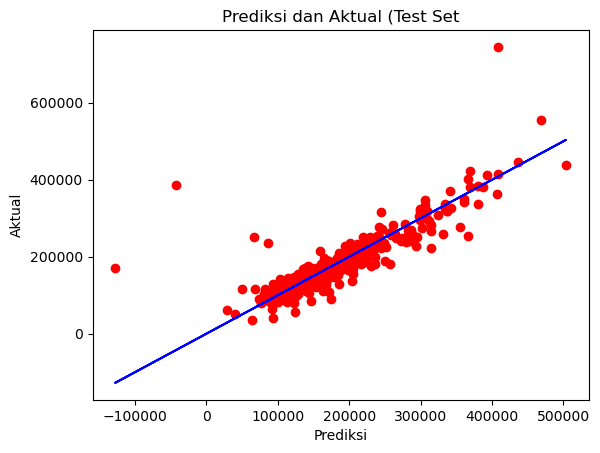

In [38]:
#Visualisasi hasil test
plt.scatter(pred_test, y_test, color = 'red')
plt.plot(pred_test, model_reg.predict(X_test), color = 'blue')
plt.title('Prediksi dan Aktual (Test Set')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

### Menghitung metrics di *test set*

In [39]:
# Menghitung nilai error (MAE, MSE, RMSE) di Test Set
print('MAE = {0:.2f}'.format(metrics.mean_absolute_error(y_test, pred_test)))           # MAE adalah nilai error rata-rata seperti yang ada di tabel banding_train
print('MSE = {0:.2f}'.format(metrics.mean_squared_error(y_test, pred_test)))            # penulisan {0:.2f} adalah untuk menuliskan 2 angka di belakang koma
print('RMSE = {0:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, pred_test))))
print('R2 = {0:.2f}'.format(metrics.r2_score(y_test, pred_test)))

MAE = 19885.05
MSE = 1595747313.06
RMSE = 39946.81
R2 = 0.73


<br>

## *Perbandingan Beberapa Modeling, Cross Validation dan Hyperparameter Tuning*

In [40]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

### Linear Regression

In [41]:
linreg = LinearRegression()

mode_linreg = Pipeline([
    ('preprocessing', preprocessor),
    ('linear', linreg)
])

# Hyperparameter tuning Linear Regression
param_linreg = {}

### Decision Tree Regressor

In [42]:
dt = DecisionTreeRegressor(random_state=0)

mode_dt = Pipeline([
    ('preprocessing', preprocessor),
    ('dt', dt)
])

# Hyperparameter tuning regresi Decision Tree
param_dt = {
    'dt__splitter': ['best','random'],
    'dt__max_depth': np.arange(1,10), 
    'dt__min_samples_split': np.arange(2,10),
    'dt__min_samples_leaf': np.arange(1,5)
    }

### Random Forest Regressor

In [43]:
# Model regresi Random Forest
rf = RandomForestRegressor(random_state=0)

# Pipeline model regresi Random Forest
mod_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('rf', rf)
])

# Hyperparameter tuning regresi Random Forest
param_rf = {
    'rf__n_estimators': np.arange(100,500,100),
    'rf__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], 
    'rf__min_samples_split': np.arange(2,10),
    'rf__min_samples_leaf': np.arange(1,5)
    }

### XGBoost

In [44]:
# Model regresi XGBoost
xgb = XGBRegressor()

# Pipeline model regresi XGBoost
mod_xgb = Pipeline([
    ('preprocessing', preprocessor),
    ('xgb',xgb)
    ])

# Hyperparameter tuning regresi XGBoost
param_xgb = {
    'xgb__learning_rate':[0.01, 0.05, 0.1],
    'xgb__n_estimators':[200, 300, 400]
    }

In [45]:
# Model training dengan cross validation
daftar_model = [mode_linreg, mode_dt, mod_rf, mod_xgb]
daftar_nama_model = ['linear', 'dt', 'rf', 'xgb']
mean_mae = []
mean_r2 = []
std_mae = []
std_r2 = []
test_score_mae = []
test_score_r2 = []

# Looping untuk setiap model yang sudah disiapkan 
for i in daftar_model:
    
    # Melakukan cross validation dan menggunakan kriteria berdasarkan skor MAE dan R2
    cv_mae = -cross_val_score(i, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)  
    cv_r2 = cross_val_score(i, X_train, y_train, cv=5, scoring='r2', verbose=1, n_jobs=-1)
    
    # Menghitung nilai rata-rata MAE dan R2 dan menambahkannya ke variabel mean_mae dan mean_r2
    mean_mae.append(cv_mae.mean())
    mean_r2.append(cv_r2.mean())
    
    # Menghitung nilai standar deviasi MAE dan R2 dan menambahkannya ke variabel std_mae dan std_r2
    std_mae.append(cv_mae.std())
    std_r2.append(cv_r2.std())
    
    # Melakukan fitting training set kemudian melakukan prediksi  di test set
    i.fit(X_train, y_train)
    i_predict = i.predict(X_test)
    
    # Menghitung nilai rata-rata MAE dan R2 di test set dan menambahkannya ke variabel test_score_mae dan test_core_r2
    test_score_mae.append(mean_absolute_error(y_test, i_predict))
    test_score_r2.append(r2_score(y_test, i_predict))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

In [46]:
# Membuat DataFrame
cv_mae = pd.DataFrame({'model':daftar_nama_model, 'Train_Mean':mean_mae, 'std':std_mae, 'Test_Score':test_score_mae})
cv_r2 = pd.DataFrame({'model':daftar_nama_model, 'Train_Mean':mean_r2, 'std':std_r2, 'Test_Score':test_score_r2})

In [47]:
cv_mae

,model,Train_Mean,std,Test_Score
0,linear,1.205910e+15,2.056169e+15,4.025896e+13
1,dt,2.844041e+04,1.779348e+03,2.688798e+04
2,rf,1.885855e+04,1.782172e+03,1.736947e+04
3,xgb,2.025155e+04,2.131615e+03,1.785463e+04


In [48]:
# Mengurutkan skor dari kecil ke besar
cv_mae_urut = cv_mae.sort_values(by=['Train_Mean','Test_Score'],  ignore_index=True)
cv_mae_urut

,model,Train_Mean,std,Test_Score
0,rf,1.885855e+04,1.782172e+03,1.736947e+04
1,xgb,2.025155e+04,2.131615e+03,1.785463e+04
2,dt,2.844041e+04,1.779348e+03,2.688798e+04
3,linear,1.205910e+15,2.056169e+15,4.025896e+13


In [49]:
# Melihat hasil cross validation berdasarkan R2
cv_r2

,model,Train_Mean,std,Test_Score
0,linear,-3.991651e+22,7.589750e+22,-2.504231e+19
1,dt,6.628554e-01,6.561517e-02,7.023140e-01
2,rf,8.366182e-01,2.758762e-02,8.791422e-01
3,xgb,8.194798e-01,5.156741e-02,8.831593e-01


In [50]:
# Mengurutkan skor dari besar ke kecil
cv_r2_urut = cv_r2.sort_values(by=['Train_Mean','Test_Score'], ascending=False, ignore_index=True)
cv_r2_urut

,model,Train_Mean,std,Test_Score
0,rf,8.366182e-01,2.758762e-02,8.791422e-01
1,xgb,8.194798e-01,5.156741e-02,8.831593e-01
2,dt,6.628554e-01,6.561517e-02,7.023140e-01
3,linear,-3.991651e+22,7.589750e+22,-2.504231e+19


## *Hyperparameter Tuning*

In [51]:
# Model training dengan GridSearchCV
daftar_model = [mode_linreg, mode_dt, mod_rf, mod_xgb]
daftar_nama_model = ['linear', 'dt', 'rf', 'xgb']
daftar_param_model = [param_linreg, param_dt, param_rf, param_xgb]

# Nilai yang akan diisikan
mae_tuning = []
mae_tuning_test = []
r2_tuning = []
r2_tuning_test = []
best_param = []
best_estimator = []

for i in range(len(daftar_model)):
    
    # Menjalankan GridSearchCV
    model_grid_cv = GridSearchCV(
    daftar_model[i],
    daftar_param_model[i],
    cv=3,
    verbose=1,
    n_jobs=-1
    ).fit(X_train,y_train)
    
    # Mencoba memprediksi training dan test set setelah fitting di training set, kemudian dikemas dalam format DataFrame
    pred_train = pd.DataFrame(model_grid_cv.predict(X_train), columns=[target])
    pred_test = pd.DataFrame(model_grid_cv.predict(X_test), columns=[target])

    # Mencatat skor MAE training dan test set
    mae_tuning.append(mean_absolute_error(y_train, pred_train))
    mae_tuning_test.append(mean_absolute_error(y_test, pred_test))

    # Mencatat skor R2 training dan test set
    r2_tuning.append(r2_score(y_train, pred_train))
    r2_tuning_test.append(r2_score(y_test, pred_test))   
    
    # Mencatat parameter terbaik di setiap model
    best_param.append(model_grid_cv.best_params_)
    
    # Merekam settingan modelnya
    best_estimator.append(model_grid_cv.best_estimator_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 576 candidates, totalling 1728 fits
Fitting 3 folds for each of 512 candidates, totalling 1536 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [52]:
#Membuat DataFrame dan mengurutkan
grid_mae = pd.DataFrame({'model':daftar_nama_model, 'Training':mae_tuning, 'Testing':mae_tuning_test})
grid_mae_urut = grid_mae.sort_values(by='Testing', ignore_index=True)

grid_r2 = pd.DataFrame({'model':daftar_nama_model, 'Training':r2_tuning, 'Testing':r2_tuning_test})
grid_r2_urut = grid_r2.sort_values(by='Testing', ascending=False, ignore_index=True)

Memilih model terbaik dari keempat model tadi

In [53]:
#Tuning berdasarkan MAE
grid_mae_urut

,model,Training,Testing
0,xgb,322.336052,1.632551e+04
1,rf,7881.266393,1.758782e+04
2,dt,15913.230211,2.455339e+04
3,linear,14888.977733,4.025896e+13


In [54]:
#Tuning berdasarkan R2
grid_r2_urut

,model,Training,Testing
0,xgb,0.999965,8.835487e-01
1,rf,0.969118,8.753226e-01
2,dt,0.905509,7.834540e-01
3,linear,0.933135,-2.504231e+19


In [55]:
#Melihat parameter terbaik
grid_param = pd.DataFrame({'model':daftar_nama_model, 'Param':best_param})
grid_param

,model,Param
0,linear,{}
1,dt,"{'dt__max_depth': 8, 'dt__min_samples_leaf': 4..."
2,rf,"{'rf__criterion': 'poisson', 'rf__min_samples_..."
3,xgb,"{'xgb__learning_rate': 0.1, 'xgb__n_estimators..."


In [56]:
grid_estimator = pd.DataFrame({'model':daftar_nama_model, 'Param':best_estimator})
grid_estimator

,model,Param
0,linear,"(ColumnTransformer(remainder='passthrough',\n ..."
1,dt,"(ColumnTransformer(remainder='passthrough',\n ..."
2,rf,"(ColumnTransformer(remainder='passthrough',\n ..."
3,xgb,"(ColumnTransformer(remainder='passthrough',\n ..."


In [57]:
#Menggabuungkan semua dan mengurutkan berdasarkan nilai R2 di test set sebagai model best parameter
model_best_param = pd.DataFrame({'model':daftar_nama_model, 'Param':best_param, 'Testing':r2_tuning_test})
model_best_param = model_best_param.sort_values(by='Testing', ascending=False, ignore_index=True)
model_best_param

,model,Param,Testing
0,xgb,"{'xgb__learning_rate': 0.1, 'xgb__n_estimators...",8.835487e-01
1,rf,"{'rf__criterion': 'poisson', 'rf__min_samples_...",8.753226e-01
2,dt,"{'dt__max_depth': 8, 'dt__min_samples_leaf': 4...",7.834540e-01
3,linear,{},-2.504231e+19


In [58]:
# Melihat parameter terbaik
model_best_param['Param'][0]

{'xgb__learning_rate': 0.1, 'xgb__n_estimators': 400}

In [82]:
# Kita gabungkan semua dan urutkan berdasarkan nilai R2 di test set sebagai 'model_best_estimator'
model_best_estimatror = pd.DataFrame({'model':daftar_nama_model, 'Param':best_estimator, 'Testing':r2_tuning_test})
model_best_estimatror = model_best_estimatror.sort_values(by='Testing', ascending=False, ignore_index=True)
model_best_estimatror

,model,Param,Testing
0,xgb,"(ColumnTransformer(remainder='passthrough',\n ...",8.835487e-01
1,rf,"(ColumnTransformer(remainder='passthrough',\n ...",8.753226e-01
2,dt,"(ColumnTransformer(remainder='passthrough',\n ...",7.834540e-01
3,linear,"(ColumnTransformer(remainder='passthrough',\n ...",-2.504231e+19


<br>

## Menggunakan Model Terbaik

dengan dataset utuh 

In [60]:
!pip install xgboost

In [124]:
xgb = XGBRegressor()

model_xgb = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('xgb', xgb)
])

In [133]:
model_final = model_xgb.fit(X_train, y_train)
model_final

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('preprocessing numerik',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUn...
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [119]:
# Menghitung importances dari pipeline adaboost
importances = model_final[1].feature_importances_
ada_importances = pd.Series(importances, index=model_final['preprocessing'].get_feature_names_out())

In [106]:
# Melihat intercept
print(model_reg['regresi lasso'].intercept_)

# Melihat koefisien
print(model_reg['regresi lasso'].coef_)

-1186202.9624692318
[ 8.37370558e+01 -3.92097607e+03  1.17079709e+03  9.36444025e+03
  7.78296665e+03  6.95548240e+03  1.42500132e+04  2.36832927e+03
  5.02140304e+03  1.03698872e+04  2.56552184e+03  3.87399440e+03
  4.50982840e+03  1.83934662e+04  2.73764543e+04  8.84315269e+01
  4.30147350e+03  1.53398487e+03  9.34553540e+02  2.77488395e+03
  1.89811656e+03 -3.66855084e+03 -2.34262910e+03  2.14476371e+03
  2.79268449e+02  7.16694872e+02  2.17969073e+03  2.46403112e+03
  2.25604172e+03  1.40518744e+03  1.83687705e+03  3.99911109e+02
  1.87319837e+03  5.94824455e+04  8.79320855e+02  2.14577124e+01
 -3.22497780e+02  3.42827147e+04  1.18191147e+04  1.80881688e+04
  1.36994298e+04  1.92653721e+04 -2.46388954e+03  4.88584525e+02
  4.00954616e+03 -3.92874282e+03  1.30046891e+03  1.18773631e+04
 -1.25916428e+04  1.58419374e+03 -2.19649037e+04  6.62409649e+03
 -4.78244666e+03 -5.65881967e+03 -1.81436719e+03  6.66668420e+02
 -4.30693940e+04  3.97055510e+03  4.83942312e+02 -2.87786731e+03
 -2.0

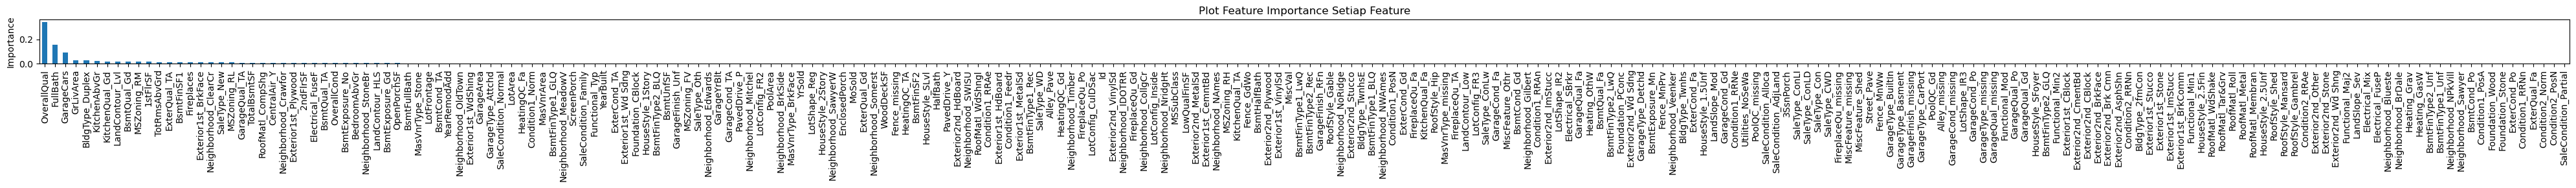

In [120]:
# Melakukan plotting
fig, ax = plt.subplots(figsize = (40,3))
ada_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Plot Feature Importance Setiap Feature")
ax.set_ylabel("Importance")
fig.tight_layout()